# ***CS 3501: PS2***

## **1. Maximum Likelihood Estimation (MLE)**

$$p(x;\lambda) = 2 \lambda x \text{exp}(- \lambda x^2)$$


a)

Step 1: Likelihood function for $p(x;\lambda)$
$$L( \lambda ) = \Pi(2\lambda\text{exp}(-\lambda x^2))$$

Step 2: Handle $\Pi$
$$L( \lambda) = (2\lambda)^n \text{exp}(-\lambda \Sigma{x_i^2})$$

Step 3: Take the natural log of both sides and simplify
$$l(\lambda) = \text{ln}((2\lambda)^n \text{exp}(-\lambda \Sigma{x_i^2}))$$
$$l(\lambda) = \text{ln}((2\lambda)^n) + -\lambda \Sigma{x_i^2}$$
$$l(\lambda) = n\text{ln}(2) + n\text{ln}(\lambda) - \lambda \Sigma{x_i^2}$$

Step 4: Calculate the derivative
$$\frac{dl}{d \lambda} = 0 + \frac{n}{\lambda} - \Sigma{x_i^2}$$
$$\frac{dl}{d \lambda} = \frac{n}{\lambda} - \Sigma{x_i^2}$$

Step 5: Solve when the derivative is equal to $0$
$$0 = \frac{n}{\lambda} - \Sigma{x_i^2}$$
$$\Sigma{x_i^2} = \frac{n}{\lambda}$$
$$\lambda = \frac{n}{\Sigma{x_i^2}}$$

Therefore, $\lambda = \frac{n}{\Sigma{x_i^2}}$.

b)


In [1]:
import pandas as pd
import math
import numpy as np

traffic_dataset = pd.read_csv("traffic.csv")

In [2]:
# calculate lambda with equation
def calculate_lambda(data):
  n = len(data)
  denom = 0

  for i in range(n):
    x = data.iloc[i]
    denom += math.pow(x, 2)

  return n / denom

lambda_val = calculate_lambda(traffic_dataset)
print("calculated lambda value is:", lambda_val)

calculated lambda value is: 1.165649493928878


c)

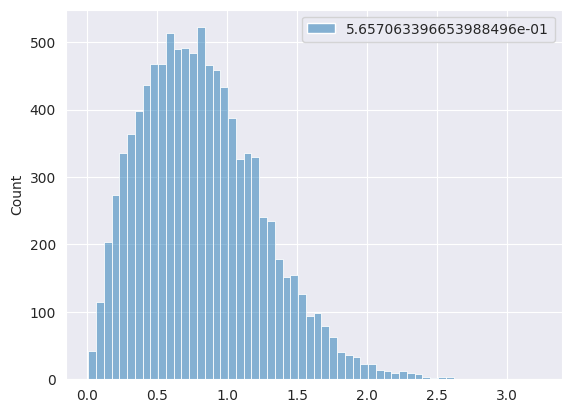

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# histogram
sns.set_style("darkgrid")

sns.histplot(data = traffic_dataset)
plt.show()

<ipython-input-4-b26e3cb69bcc>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


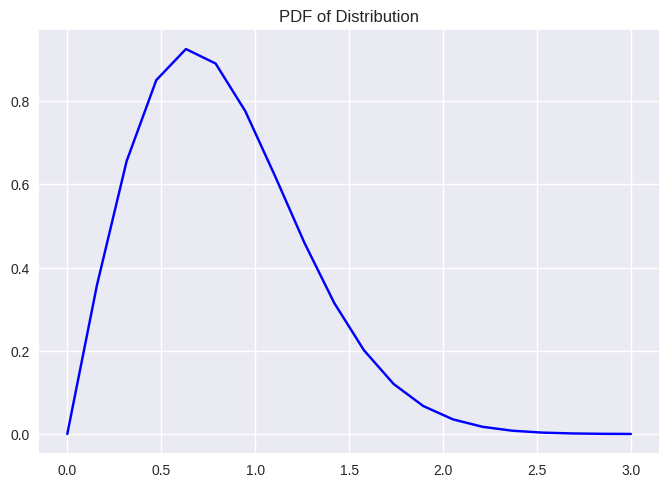

In [4]:
# plot distribution
def create_pdf(lambda_param):
  x = np.linspace(0, 3, num = 20, axis = 0)
  y = []

  calc_prob = lambda p : 2 * lambda_param * p * np.exp(- lambda_param * math.pow(p, 2))

  for i in x:
    y.append(calc_prob(i))

  plt.style.use("seaborn")
  plt.plot(x, y, color = "blue")
  plt.title("PDF of Distribution")

# create the pdf
create_pdf(lambda_val)

I found that both the histogram and the pdf of the distribution with the calculated $\lambda$ yield similar looking distributions. Both appear as a severely right-skewed gaussian distribution.

## **2. Hypothesis Testing**

## **3. K-means**

In [44]:
# load the 2D txt file
dataset_2d_location = "./2D_data.txt"

dataset_2d = pd.read_csv(dataset_2d_location, header = None, sep = "  ")

dataset_2d.head()

<ipython-input-44-52da7d051559>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dataset_2d = pd.read_csv(dataset_2d_location, header = None, sep = "  ")


,0,1
0,1.043663,1.483404
1,1.734390,3.182709
2,1.202952,1.305265
3,3.352556,3.309276
4,1.025740,2.248754


In [85]:
# dataset_2d = dataset_2d.dropna() # drops the weird nan values
print(dataset_2d.shape)
print(dataset_2d)

(100, 2)
           0         1
0   1.043663  1.483404
1   1.734390  3.182709
2   1.202952  1.305265
3   3.352556  3.309276
4   1.025740  2.248754
..       ...       ...
95  0.303323 -0.098668
96  1.419543 -0.769057
97  0.647652 -0.493660
98  1.275093 -1.807427
99  1.839627 -0.795114

[100 rows x 2 columns]


<Axes: xlabel='0', ylabel='1'>

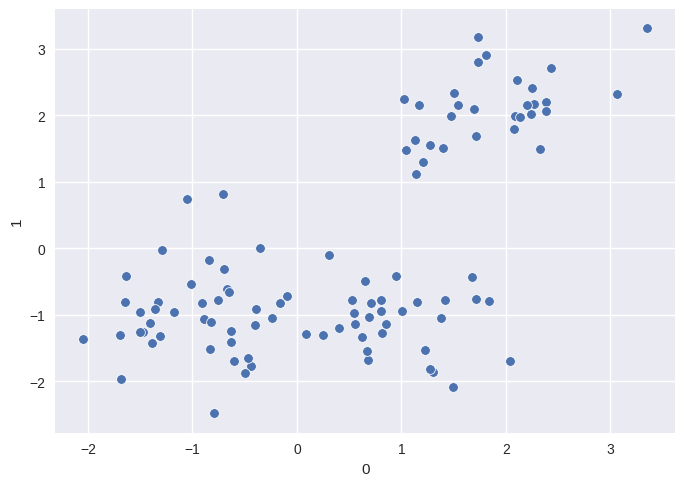

In [86]:
# plot the data unclustered
sns.scatterplot(data = dataset_2d, x = dataset_2d.loc[:, 0], y = dataset_2d.loc[:, 1])

In [87]:
print(dataset_2d.head())

          0         1
0  1.043663  1.483404
1  1.734390  3.182709
2  1.202952  1.305265
3  3.352556  3.309276
4  1.025740  2.248754


In [89]:
import random

# randomly initialize points and set their centroid to -1 (does not exist)
def initialize_points(data, k, seed = 17):
  length = data.shape[0]
  random.seed = seed
  coord_dim = len(data.iloc[0])

  centroid = [0] * coord_dim # one single centroid
  centroids_list = [] # has list of centroids

  for i in range(k): # get k centroids
    rand_index = random.randrange(length) # calculate a random index
    datapoint = data.iloc[rand_index] # gets the datapoint

    for j in range(coord_dim):
      centroid[j] = float(datapoint[j])

    # centroid[0] = float(datapoint[0])
    # centroid[1] = float(datapoint[1])

    centroids_list.append(centroid.copy()) # append to list

    if centroids_list[i] == centroids_list[i - 1] and i > 0: # if we get the same init points
      i -= 1
      centroids_list.pop()
      rand_index = random.randrange(length)
      continue


  # convert the dataset into an array of tuples where the first value of the
  # tuple refers to the closest centroid and the second is the coordinate of the
  # datapoint

  datapoints_list = [] # declare new datapoint

  for i in range(length): # loops through all the values in the dataset
    datapoint = data.iloc[i] # fetch the dataset
    coord = [float(datapoint[0]), float(datapoint[1])] # grab the coordinates
    datapoints_list.append((-1, coord)) # append to list

  return datapoints_list, centroids_list

dl, cl = initialize_points(dataset_2d, 2)
print(len(dl))
print(cl)

100
[[-1.6796125, -1.9656696], [2.0879727, 1.9928549]]


In [90]:
# calculate euclidean distance between two equal sized arrays
def calculate_euclidean_distance(datapoint_1, datapoint_2):
  summation = 0
  n = len(datapoint_1)

  for i in range(n): # calculate sum of the squares of the difference
    diff = datapoint_1[i] - datapoint_2[i]
    summation += math.pow(diff, 2)

  return math.sqrt(summation)

In [91]:
import sys

# gets the closest centroid for one datapoint
def closest_centroid_to_datapoint(datapoint, centroids_list):
  k_length = len(centroids_list)
  centroid_changed = False

  current_centroid = datapoint[0]
  closest_centroid = -1
  smallest_distance = sys.float_info.max

  for i in range(k_length):
    distance = calculate_euclidean_distance(datapoint[1], centroids_list[i])

    if distance < smallest_distance: # updates the distance
      smallest_distance = distance
      closest_centroid = i

  if closest_centroid != current_centroid: # check if there are any updates
    centroid_changed = True


  return (closest_centroid, datapoint[1]), centroid_changed

In [92]:
# updates datapoint list with closest centroid
def assign_centroids(datapoints_list, centroids_list):
  n = len(datapoints_list) # the number of datapoints

  for i in range(n):
    datapoints_list[i], hasChanged = closest_centroid_to_datapoint(datapoints_list[i], centroids_list)

  return datapoints_list, hasChanged

In [95]:
# gets average coordinates
def calculate_average(datapoints_list, centroid_id):
  coordinate_dim = len(datapoints_list[1])
  mean = [0] * coordinate_dim
  size = 0

  for datapoint in datapoints_list: # for each datapoint
    coordinates = datapoint[1]

    if datapoint[0] == centroid_id: # check cluster assignment
      size += 1

      for i in range(coordinate_dim): # coordinate value summation
        mean[i] += coordinates[i]

  for i in range(coordinate_dim): # dividing the summation by the size
    mean[i] /= size

  return mean



[0.8536571010857142, -1.06178375]


In [96]:
# updates the centroids
def update_centroids(datapoints_list, centroids_list):
  k_size = len(centroids_list) # number of centroids

  for i in range(k_size):
    centroids_list[i] = calculate_average(datapoints_list, i)

  return centroids_list

In [101]:
# actually run k-means clustering
def k_means(data, k, iteration_limit = 10, seed  = 17):

  # randomly initialize
  datapoints_list, centroids = initialize_points(data, k, seed)

  # some temporary variables
  centroid_changed = True
  iteration = 0

  # keep looping until no centroid has changed OR we hit the iteration limit
  while(centroid_changed and iteration < iteration_limit):
    datapoints_list, centroid_changed = assign_centroids(datapoints_list, centroids) # assign the points
    centroids = update_centroids(datapoints_list, centroids) # update the centroids

  return datapoints_list, centroids

In [ ]:
# plot the clustered data
def plot_clustered_data(datapoints_list):
  x_coord = []
  y_coord = []

In [102]:
# for k = 2
clustered_data_k2, centroids_k2 = k_means(data = dataset_2d, k = 2, iteration_limit = 10, seed = 17)

## **Bonus Points**

## **References**

### **Documentation**

https://seaborn.pydata.org/

https://docs.python.org/3/


### **Forum Posts**

### **Websites**

https://www.tutorialspoint.com/what-are-the-different-figure-styles-in-seaborn

https://www.geeksforgeeks.org/how-to-read-text-files-with-pandas/

https://note.nkmk.me/en/python-sys-float-info-max-min/

https://www.geeksforgeeks.org/remove-last-element-from-list-in-python/



